In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.preprocessing import Normalizer

### 1.0 Load embeddings data

In [32]:
norm = Normalizer('l2')
embd_data = np.load('5-celebrity-faces-embeddings.npz')
trainx_embd, trainy, testx_embd, testy = embd_data['arr_0'], embd_data['arr_1'], embd_data['arr_2'], embd_data['arr_3']
print(trainx_embd.shape, testx_embd.shape)
print('***normalize embeddings*****')
trainx_embd = norm.transform(trainx_embd)
testx_embd = norm.transform(testx_embd)
print('****done*****')

(70, 128) (26, 128)
***normalize embeddings*****
****done*****


In [33]:
# calculates the eucidean and cosin distnace between 2 face embeddings
def distance(embeddings1, embeddings2, distance_metric = 0):
    if distance_metric == 0:
        'taking euclidean distance :'
        dist = np.linalg.norm(embeddings1 - embeddings2, axis = 0)
    elif distance_metric == 1:
        'taking cosine distance :'
        dot = np.sum(np.multiply(embeddings1, embeddings2))
        denominator = np.multiply(np.linalg.norm(embeddings1), np.linalg.norm(embeddings2) )
        similarity = dot/denominator
        dist = np.arccos(similarity) / math.pi #np.arccos([1, -1]) = array([ 0.        ,  3.14159265])
    return dist

### 2.0 Finding the Threshold that can be taken to seperate the same pair of images and different pair of images :

In [34]:
dist_values = [] #distance values between embd for same and diff face embedding
same_or_not = [] #same image oor not label (yes or no)
for i in range(len(trainy)):
    for j in range(len(trainy)):
        if i != j:
            dist = distance(trainx_embd[i], trainx_embd[j], 0)
            dist_values.append(dist)
            if trainy[i] == trainy[j]:
                same_or_not.append('yes')
            else:
                same_or_not.append('no')
dist_values = np.array(dist_values)            
same_or_not = np.array(same_or_not)

In [35]:
df = pd.DataFrame(np.vstack((dist_values, same_or_not)).T, columns= ['distance', 'labels'] )
print(df.head())
print('****************')
print(df['labels'].value_counts())

     distance labels
0  0.84443504    yes
1   1.2964885    yes
2   1.0331293    yes
3   1.0350996    yes
4   0.8582969    yes
****************
no     3920
yes     910
Name: labels, dtype: int64


### kde plot for the distance between same and different face embeddings

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'pdf')

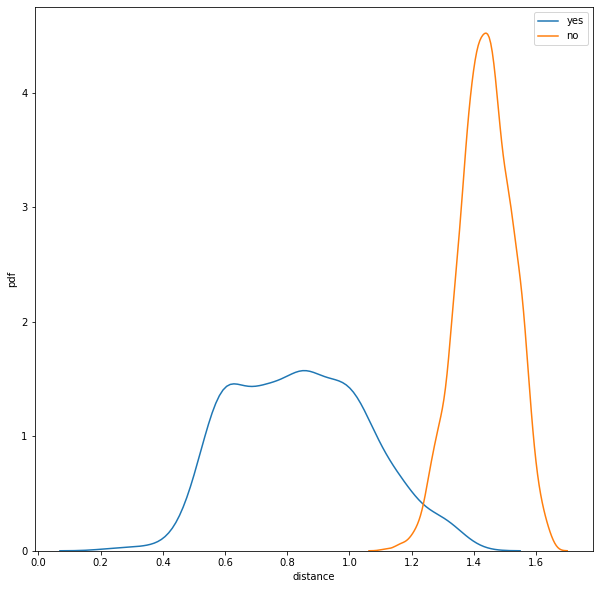

In [36]:
plt.figure(figsize=(10,10))
sns.kdeplot(df.loc[df['labels'] == 'yes']['distance'], label = 'yes')
sns.kdeplot(df.loc[df['labels'] == 'no']['distance'], label = 'no')
plt.xlabel('distance')
plt.ylabel('pdf')

- TAKING THRESHOLD VALUE AS 1.25